✍ В этом юните мы рассмотрим систему рекомендаций на основе контента, или, как её чаще называют, **content-based model**.

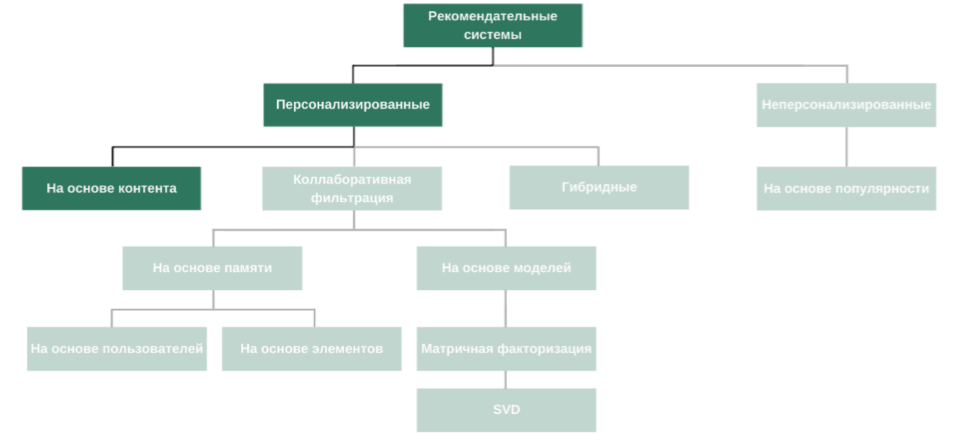

### Персонализированные (Personalized)

Такие рекомендательные системы базируются на детальном анализе данных пользователей, изучении их действий, покупок, взаимодействия с другими пользователями. Таким образом, каждый человек получает индивидуальную рекомендацию конкретно под его особенности и предпочтения.

Наиболее популярными типами персонализированных рекомендательных систем являются системы, основанные на контенте (content-based) и коллаборативной фильтрации (collaborative filtering).

### На основе контента (Content-based)

Рекомендательные системы на основе контента используют метаданные (дополнительные данные о данных) о товарах или пользователях для создания конкретных рекомендаций. Например, если пользователь уже читал книгу одного автора или покупал товар определённой марки, то предполагается, что он отдаёт предпочтение этому автору или этой марке, и существует вероятность, что он купит аналогичный товар в будущем.

Предположим, пользователю Ане нравятся научно-фантастические книги, и её любимый писатель — Уолтер Джон Уильямс. Если она прочитала книгу "Aristoi", то рекомендуемой ей книгой будет "Angel Station" — ещё одна научно-фантастическая книга, написанная Уолтером Джоном Уильямсом.

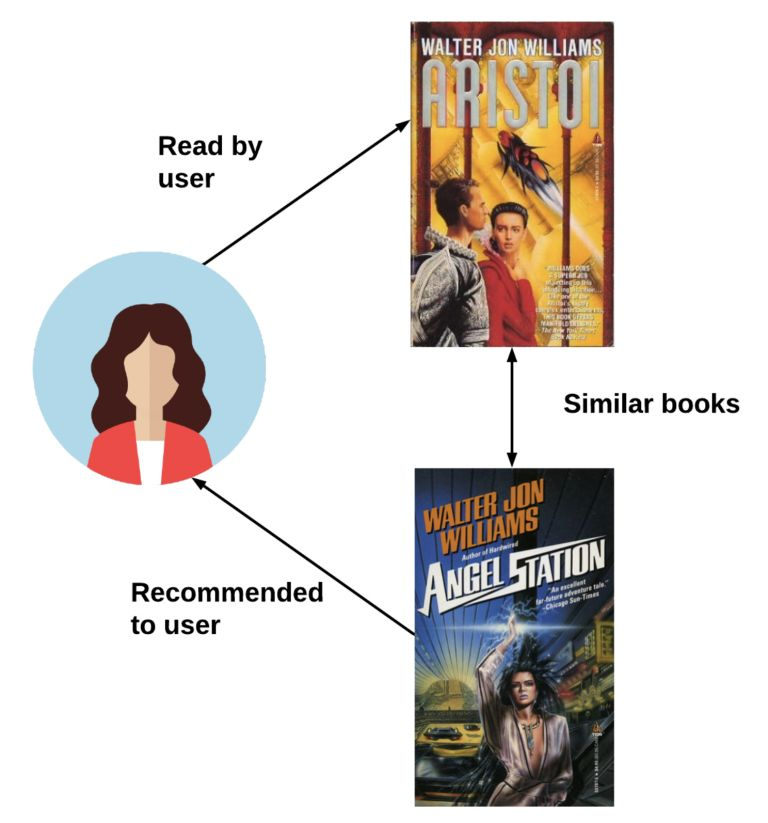

## Подход **content-based** предполагает, что пользователю рекомендуются товары или контент на основе его предпочтений и вкусов.

Профиль интересов пользователя формируется исходя из его оценок, а также неявной обратной связи: лайков, количества просмотров и так далее. В качестве рекомендаций пользователю предлагаются **похожие** элементы.

*Сходство или близость элементов измеряется на основе сходства содержания этих элементов. Говоря «содержание», мы имеем в виду такие сущности, как категория, тег, жанр и т. д., то есть метаданные. Далее в этом юните мы познакомимся с некоторыми алгоритмами определения сходства.*

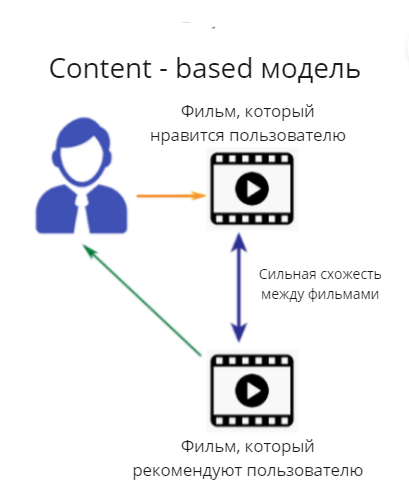

Вы наверняка уже сталкивались с content-based-рекомендациями в тех или иных сервисах. Например, на сайте Netflix можно использовать фильтрацию по контенту, чтобы создавать рекомендации из аналогичных элементов, которые размещаются в разделе More Like This.

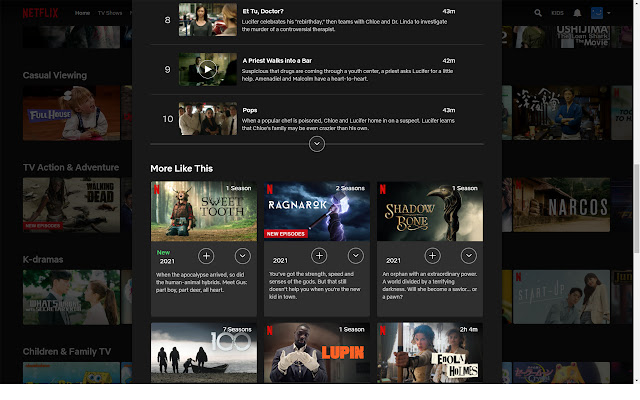

*Давайте на примере рассмотрим построение рекомендательной системы на основе контента для конкретного пользователя.*

Допустим, пользователь Михаил выставил лайки и дизлайки для фильмов на одном из веб-сервисов:

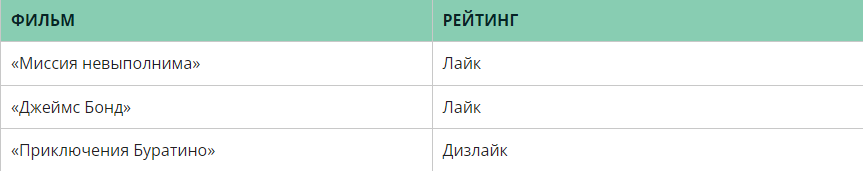

Предположим, что по правилам сервиса лайк прибавляет 4.5 балла к фильмам с таким жанром, а дизлайк вычитает 6 баллов. Теперь создадим вектор пользователя для Михаила на основе трёх его оценок:

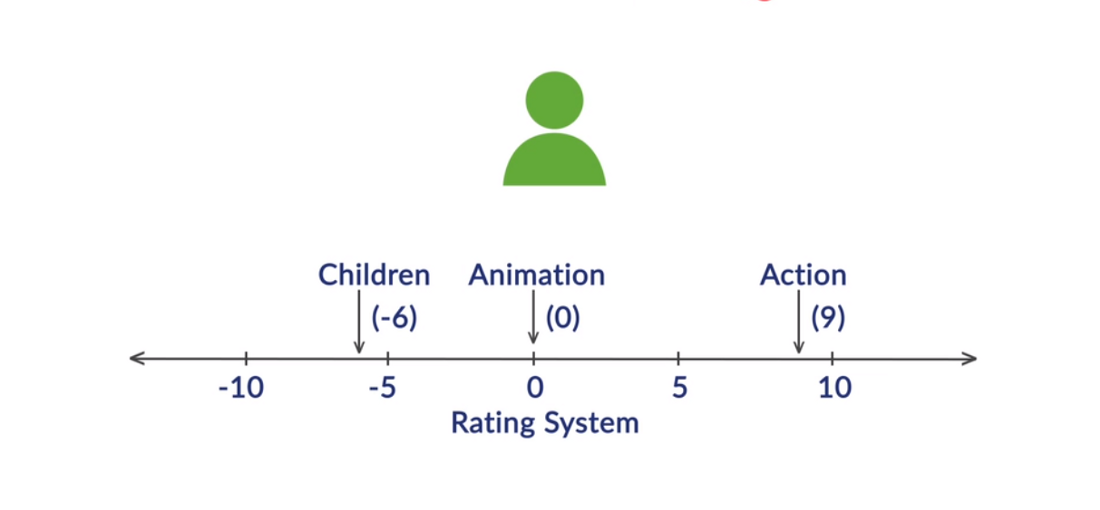

Присваиваем значение 9 боевикам, так как Михаил поставил лайк двум фильмам с жанром «боевик». Михаил не смотрел анимационные фильмы, так что присваиваем 0 анимации, и, поскольку он оставил плохой отзыв фильму в жанре «дети», присваиваем -6 детским фильмам.

### Таким образом, вектор пользователя для Михаила — это $(9, 0, -6)$ для шкал (Боевик, Анимация, Дети).

*Теперь попробуем предсказать отношение Михаила к фильмам, которые он ещё не смотрел, например «Звёздные войны» и «История игрушек».*

### «Звёздные войны» — это боевик, который не относится к анимации или детским фильмам, поэтому по шкалам (Боевик, Анимация, Дети) у этого фильма будут координаты $(1, 0, 0)$. У фильма «История игрушек» будут координаты $(0, 1, 1)$, так как он относится и к жанру детских фильмов, и к анимации.

Теперь нам необходимо найти произведения вектора пользователя и вектора фильма: чем больше будет скалярное произведение, тем более подходящим для Михаила будет фильм.

### Скалярное произведение для «Истории игрушек» равно $-6$, а для «Звёздных войн» оно равно $9$. Следовательно, из этих двух вариантов именно «Звёздные войны» будут рекомендованы Михаилу, что вполне логично, ведь ему больше нравятся боевики.

Аналогично можно вычислить скалярные произведения векторов для всех фильмов на сайте и рекомендовать Михаилу десять наиболее подходящих фильмов.

## В данном примере мы опирались лишь на схожесть фильмов по жанрам: скалярное произведение будет увеличиваться в том случае, если у фильма ненулевая координата для того жанра, который пользователь уже оценил положительно. Однако в реальности всё намного сложнее: например, мы можем использовать одновременно жанр фильма, теги, описание, актёров и т. д. Для этого случая нам нужен способ измерить сходство между набором параметров.

Рассмотрим два наиболее популярных метода измерения такого сходства:

+ **индекс Жаккара**,
+ косинусная близость.

# ИНДЕКС ЖАККАРА

Индекс Жаккара измеряет сходство между двумя наборами A и B как мощность множества пересечения, делённую на мощность множества объединения каких-то характеристик объекта. Его удобно применять для категориальных признаков.

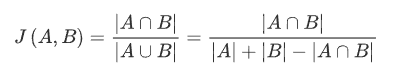

Например, с помощью индекса Жаккара мы можем оценить, насколько похожи фильмы, основываясь на наборах ключевых слов (тегов) для них:

+ фильм А : {фантастика, школа, романтика};
+ фильм B : {приключения, фантастика, школа};
+ фильм C : {ужасы, триллер, драма}.

Мы можем предположить, что фильм A больше похож на фильм B, чем на фильм C, так как фильмы A и B имеют два общих тега (фантастика, школа), в то время как фильмы A и C не имеют ни одного общего тега.

## Если бы мы рассматривали вычисление этого индекса для фильмов А и В, то получили бы 2/4, так как в пересечении два тега, а в объединении — четыре. Для фильмов А и C мы получили бы 0, так как пересечение множеств их тегов является пустым. Таким образом, показатель близости для фильмов А и В получился бы больше, и это подтвердило бы наши предположения об их большей схожести.

# КОСИНУСНАЯ БЛИЗОСТЬ

Подход с использованием индекса Жаккара помог нам создать интуитивное представление о том, что означает сходство набора категориальных значений. Подход с **косинусным сходством** немного сложнее и применяется для оценки близости массивов с числами. Он требует, чтобы мы представляли объекты в виде вектора.

Например, мы можем представить те же самые фильмы как набор из трёх вещественных чисел:

+ фильм $A = (1.1, 2.3, 5.1)$;
+ фильм $B = (1.3, 2.1, 4.9)$;
+ фильм $C = (5.1, 6.2, 1.1)$.

Глядя на эти векторы, кажется, что фильмы А и В похожи друг на друга больше, чем, например, фильмы А и С, так как координаты фильмов А и В очень близки и различаются гораздо меньше, чем координаты фильмов А и С.

Чтобы вычислить косинусную близость, нам понадобится следующая формула:

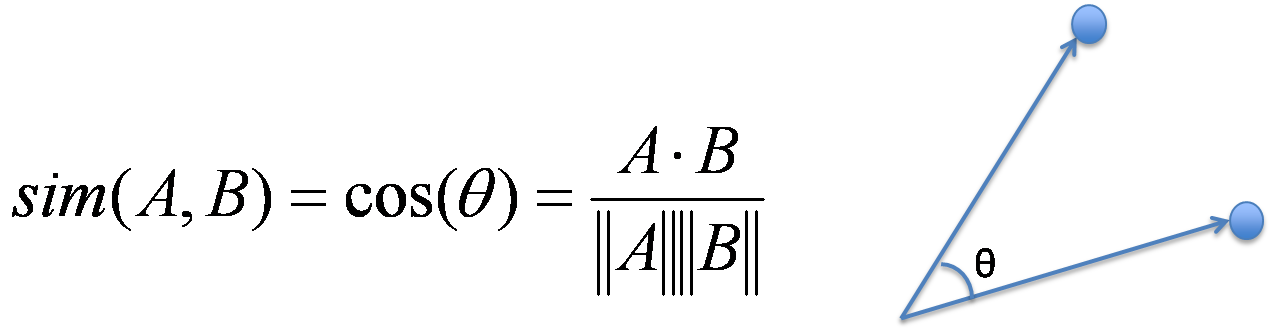

По сути, мы ищем угол между векторами. Если два вектора совпадут (т. е. будут максимально близкими), то угол между ними будет равен нулю, а значит, косинус будет равен $1$. Если векторы будут направлены в противоположные стороны, косинус будет равен $-1$. Таким образом, мы можем получить для любых двух векторов значение в пределах от $-1$ до $1$ включительно, по которому можно определить, насколько векторы близки друг к другу.

Давайте вычислим косинусную близость, чтобы оценить, насколько наши догадки о близости фильмов соответствуют реальности.

Косинусная близость для фильмов А и B:

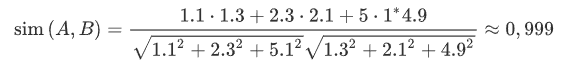

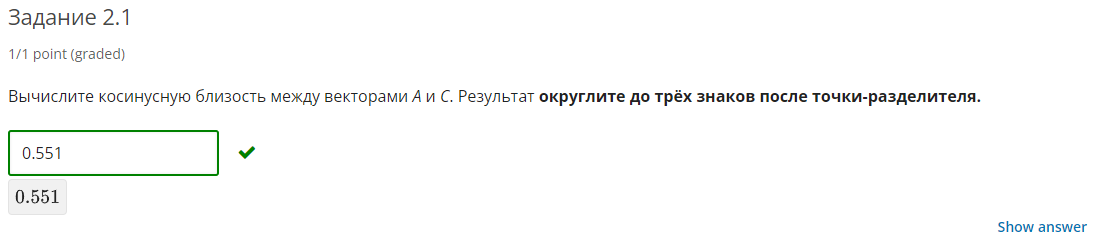
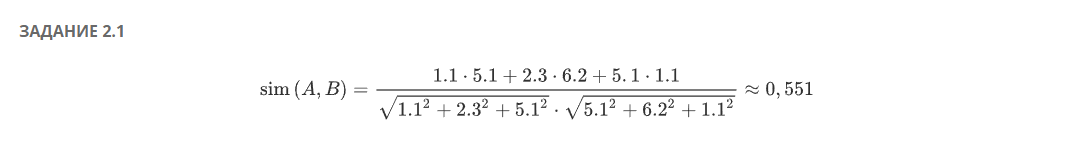

### Как нам известно, чем выше значение косинусной близости, тем больше сходство между векторами. Таким образом, наши изначальные предположения совпали с реальностью: векторы А и В действительно схожи между собой сильнее, чем векторы А и С. Значит, если человек поставил высокую оценку фильму А, то мы должны порекомендовать ему фильм В.

Итак, чтобы построить рекомендательную систему на основе контента, необходимо:

1. Для каждого продукта создать характеризующие его признаки.
2. Найти показатель близости между всеми продуктами.
3. Порекомендовать пользователю продукты, которые показывают наибольшую близость с теми продуктами, которые он высоко оценил.

Давайте реализуем подобную рекомендательную систему на практике. Будем работать с [датасетом](https://lms.skillfactory.ru/assets/courseware/v1/747dae7bf99b18ce3b24bd34aa7bc29b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/netflix_titles.zip), содержащим информацию об оценивании фильмов на платформе Netflix.

Признаки в данных:

+ show_id — id фильма,
+ type — его тип (фильм или сериал),
+ title — название,
+ director — режиссер,
+ cast — актерский состав,
+ country — страна,
+ date_added — дата добавления,
+ release_year — год выхода на экраны,
+ rating — рейтинг,
+ duration — продолжительность,
+ listened_in — жанр(-ы),
+ description — описание.

В первую очередь нам необходимо определить, на основании чего мы будем рассматривать близость фильмов. Выберем для этой задачи описание фильма, ведь в нём, скорее всего, содержится много информации. Однако описание — это текст. Есть много подходов к преобразованию текста в вектор, и мы будем использовать подход **TF-IDF** (*Term Frequency-Inverse Document Frequency*).

## **Показатель TD-IDF** — это индикатор того, насколько релевантно слово в контексте документа.

Его можно определить следующим образом:

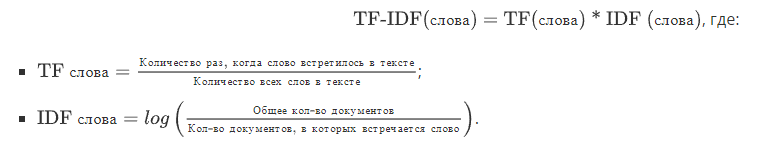

Этот показатель возрастает пропорционально количеству раз, когда слово встречается в тексте, и уменьшается пропорционально количеству слов во всех текстах в целом.

Таким образом:

+ **Коэффициент будет выше**, если слово характерно именно для этого текста, то есть встречается в данном тексте часто, но не встречается в других текстах.
+ **Коэффициент будет ниже**, если слово не встречается почти нигде или встречается одинаковое количество раз во всех текстах, то есть не характеризует никакой текст в отдельности.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Чтобы преобразовать текст по этому принципу, нам понадобится соответствующая функция из библиотеки sklearn — импортируем её:


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

Далее учтём стоп-слова, т. е. предлоги и другие служебные части речи, которые не несут содержательной информации, и с учётом этого определим нашу модель:

In [5]:
model = TfidfVectorizer(stop_words='english')

Заполним пропуски пустыми строками:

In [6]:
df['description'] = df['description'].fillna('')

Трансформируем наши описания в матрицу:

In [7]:
feature_matrix = model.fit_transform(df['description'])

## Задание 2.2

Сколько столбцов в получившейся матрице?

In [8]:
feature_matrix.shape

(7787, 17905)

Теперь необходимо вычислить косинусную близость. Можно сделать это так:

In [9]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(feature_matrix, feature_matrix)

## Обратите внимание! Мы используем здесь linear_kernel(), а не cosine_similarity(), так как в косинусном расстоянии в знаменателе реализуется нормировка векторов, а TF-IDF создаёт уже нормализованные векторы.

Вернём индексацию и уберём дубликаты из данных:

In [10]:
indices = pd.Series(df.index,index=df['title']).drop_duplicates()

Теперь пропишем функцию для создания рекомендаций:

In [11]:
def get_recommendations(title):
    idx = indices[title]
    #вычисляем попарные коэффициенты косинусной близости
    scores = list(enumerate(cosine_sim[idx]))
    #сортируем фильмы на основании коэффициентов косинусной близости по убыванию
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    #выбираем десять наибольших значений косинусной близости; нулевую не берём, т. к. это тот же фильм
    scores =   scores[1:11]
    #забираем индексы
    ind_movie = [i[0] for i in scores]
    #возвращаем названия по индексам
    return df['title'].iloc[ind_movie]

Например, если мы хотим найти рекомендации по фильму "Star Trek", то функция будет выдавать следующий результат:

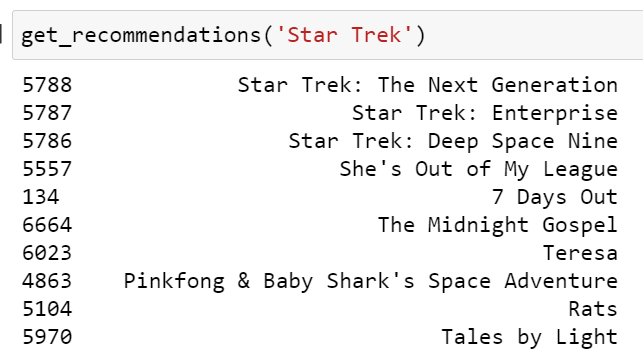

## Задание 2.3

Найдите вторую рекомендацию для детского фильма "Balto", вышедшего на экраны в 1995 году:

In [13]:
get_recommendations('Balto')

709                Balto 2: Wolf Quest
7446                           Vroomiz
1338    Chilling Adventures of Sabrina
7388                          Vampires
1770                          Dinotrux
2767                     Hold the Dark
5540                 Shanghai Fortress
4041                             Mercy
2582                       Half & Half
1365        Christmas in the Heartland
Name: title, dtype: object

Итак, мы смогли создать рекомендации на основе контента и разобрались с принципом работы этого алгоритма. Теперь давайте посмотрим на **преимущества и недостатки данного подхода**.

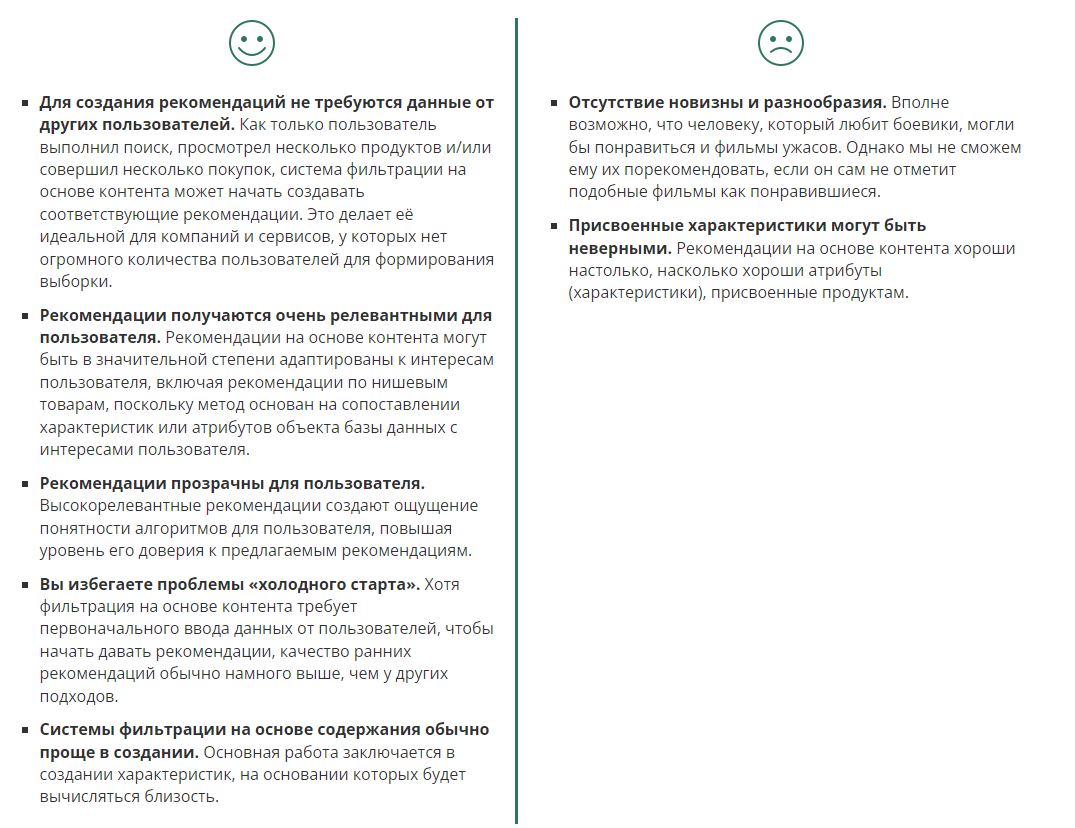

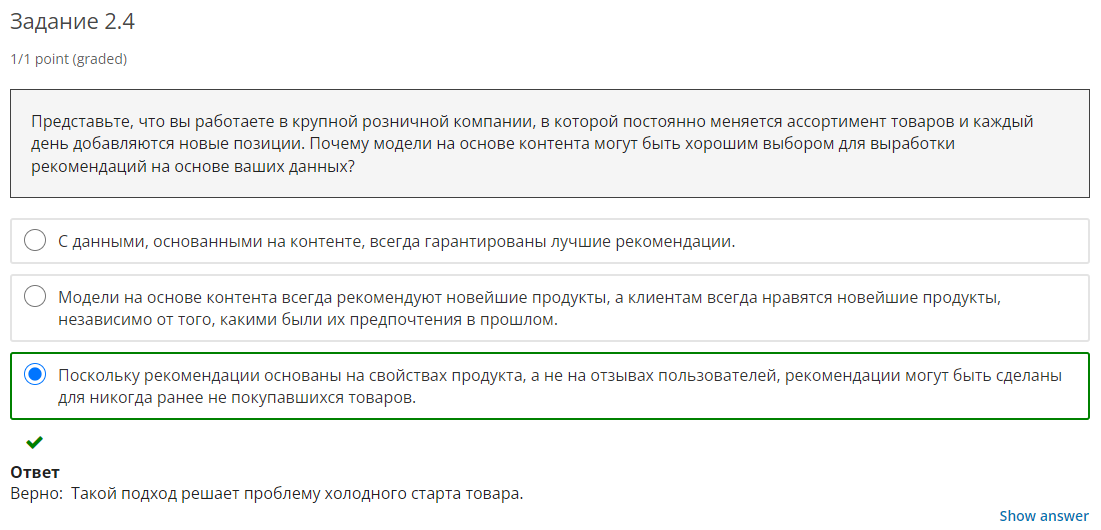

Итак, мы разобрались с первым персонализированным методом для построения рекомендательных систем. В следующих юнитах мы детально изучим другие алгоритмы.